In [1]:
import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets("/tmp/data/",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from t

In [4]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [5]:
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [6]:
mnist.train.num_examples

55000

In [7]:
mnist.test.num_examples

10000

In [8]:
import matplotlib.pyplot as plt

In [9]:
example = mnist.train.images[3].reshape(28,28)

In [10]:
print(mnist.train.images.shape)
print(mnist.test.images.shape)

(55000, 784)
(10000, 784)


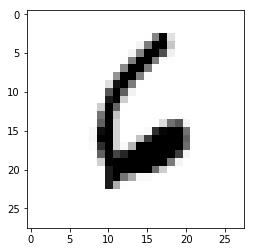

In [11]:
plt.imshow(example, cmap='Greys')

In [45]:
#Setting the parameters
learning_rate = 0.001
batch_size = 80
epochs = 100

n_hidden1 = 256
n_hidden2 = 256
n_input = 784
n_output = 10
n_samples = mnist.train.num_examples

x = tf.placeholder('float',[None,n_input])
y = tf.placeholder('float',[None,n_output])

In [46]:
#Creating the model
def model(x,weights,biases):
    
    layer1 = tf.add(tf.matmul(x,weights['w1']),bias['b1'])
    layer1 = tf.nn.relu(layer1)

    layer2 = tf.add(tf.matmul(layer1,weights['w2']),bias['b2'])
    layer2 = tf.nn.relu(layer2)

    out_layer = tf.add(tf.matmul(layer2,weights['w3']),bias['b3'])

    return out_layer

In [47]:
# Define the weights and biases

weights = {
    'w1':tf.Variable(tf.random_normal([n_input,n_hidden1])),
    'w2':tf.Variable(tf.random_normal([n_hidden1,n_hidden2])),
    'w3':tf.Variable(tf.random_normal([n_hidden2,n_output]))    
}

bias = {
    'b1':tf.Variable(tf.random_normal([n_hidden1])),
    'b2':tf.Variable(tf.random_normal([n_hidden2])),
    'b3':tf.Variable(tf.random_normal([n_output]))
}


In [48]:
#making the predictions
pred = model(x,weights,bias)

In [49]:
#define cost and loss funcions
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [50]:
#initializing the variables
init = tf.initialize_all_variables()

In [53]:
# Running the Session
sess = tf.InteractiveSession()
sess.run(init)

for ep in range(epochs):
    avg_cost = 0.0
    no_of_batches = int(n_input/batch_size)
    
    for i in range(no_of_batches):
        b1,b2 = mnist.train.next_batch(batch_size)
        _, c = sess.run([optimizer, cost], feed_dict={x:b1, y:b2})
        avg_cost+=c/no_of_batches
        
    
    print("Epoch: {} cost={:.4f}".format(ep+1,avg_cost))
    
print('Training completed')
    

Epoch: 1 cost=1989.6813
Epoch: 2 cost=1324.4345
Epoch: 3 cost=842.3131
Epoch: 4 cost=672.9151
Epoch: 5 cost=546.4086
Epoch: 6 cost=449.8121
Epoch: 7 cost=380.6813
Epoch: 8 cost=360.7185
Epoch: 9 cost=314.1312
Epoch: 10 cost=246.9195
Epoch: 11 cost=241.5810
Epoch: 12 cost=241.4690
Epoch: 13 cost=208.7967
Epoch: 14 cost=203.8278
Epoch: 15 cost=155.5891
Epoch: 16 cost=164.3408
Epoch: 17 cost=164.8613
Epoch: 18 cost=155.7595
Epoch: 19 cost=171.8364
Epoch: 20 cost=157.6583
Epoch: 21 cost=138.0911
Epoch: 22 cost=151.7183
Epoch: 23 cost=147.5645
Epoch: 24 cost=129.9956
Epoch: 25 cost=141.9283
Epoch: 26 cost=121.2724
Epoch: 27 cost=112.5383
Epoch: 28 cost=105.2802
Epoch: 29 cost=109.5118
Epoch: 30 cost=114.9754
Epoch: 31 cost=94.0470
Epoch: 32 cost=102.4723
Epoch: 33 cost=87.7198
Epoch: 34 cost=96.7508
Epoch: 35 cost=81.4044
Epoch: 36 cost=102.0591
Epoch: 37 cost=88.0315
Epoch: 38 cost=80.2472
Epoch: 39 cost=100.8144
Epoch: 40 cost=90.2175
Epoch: 41 cost=76.0027
Epoch: 42 cost=75.9113
Epoch: 4

In [54]:
correct_predictions = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
correct_predictions = tf.cast(correct_predictions, "float")
accuracy = tf.reduce_mean(correct_predictions)

print("Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))

Accuracy: 0.8798
